In [2]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import timedelta
import time
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
import requests
from bcb import currency
from bcb import sgs
from fpdf import FPDF
from matplotlib.dates import date2num
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
# # selic = sgs.get(('selic', 432), start = '2022-10-01')
# # selic.plot(figsize = (15, 10))
# # volatilidade_12m_ibov.plot(figsize = (15, 10))
# # plt.title("Dados Ibovespa e S&P500")
#
#
# # Pegando dados do yahoo finance.
#
indices = ['^BVSP', '^GSPC']
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days = 366)
dados_mercado = pdr.get_data_yahoo(indices, start = um_ano_atras, end = hoje)
#
# # Pegando fechamento de cada ativo
#
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ["Ibov", "S&P500"]
dados_fechamento = dados_fechamento.dropna()
#
#
# # Pegando fechamento mensal e anual para calcular rentabilidades
#
dados_anuais = dados_fechamento.resample("Y").last()
dados_mensais = dados_fechamento.resample("M").last()
#
#
# # Calculando rentabilidades
#
retorno_diario = dados_fechamento.pct_change().dropna()
retorno_mes_a_mes = dados_mensais.pct_change().dropna()
retorno_mes_a_mes = retorno_mes_a_mes.iloc[1: , :]
retorno_no_ano = dados_anuais.pct_change().dropna()
#
#
# # Fechamento de dia
#
afechamento_de_dia = retorno_diario.iloc[-1, :]
#
#
# # Volatilidade ibov e S&P500
#
volatilidade_12m_ibov = retorno_diario['Ibov'].std() * np.sqrt(252)
volatilidade_12m_sp = retorno_diario['S&P500'].std() * np.sqrt(252)
#
display(dados_mercado)

Attributes      Adj Close                       Close               \
Symbols             ^BVSP        ^GSPC          ^BVSP        ^GSPC   
Date                                                                 
2021-10-21  107735.000000  4549.779785  107735.000000  4549.779785   
2021-10-22  106296.000000  4544.899902  106296.000000  4544.899902   
2021-10-25  108715.000000  4566.479980  108715.000000  4566.479980   
2021-10-26  106420.000000  4574.790039  106420.000000  4574.790039   
2021-10-27  106363.000000  4551.680176  106363.000000  4551.680176   
...                   ...          ...            ...          ...   
2022-10-17  113624.000000  3677.949951  113624.000000  3677.949951   
2022-10-18  115743.000000  3719.979980  115743.000000  3719.979980   
2022-10-19  116274.000000  3695.159912  116274.000000  3695.159912   
2022-10-20  117171.000000  3665.780029  117171.000000  3665.780029   
2022-10-21  119928.789062  3752.750000  119928.789062  3752.750000   

Attributes           High                         Low               \
Symbols             ^BVSP        ^GSPC          ^BVSP        ^GSPC   
Date                                                                 
2021-10-21  110767.000000  4551.439941  105714.000000  4526.890137   
2021-10-22  107749.000000  4559.669922  102854.000000  4524.000000   
2021-10-25  109372.000000  4572.620117  106296.000000  4537.359863   
2021-10-26  108713.000000  4598.529785  106321.000000  4569.169922   
2021-10-27  108224.000000  4584.569824  106045.000000  4551.660156   
...                   ...          ...            ...          ...   
2022-10-17  114406.000000  3689.729980  112090.000000  3638.649902   
2022-10-18  115795.000000  3762.790039  113627.000000  3686.530029   
2022-10-19  116459.000000  3728.580078  115264.000000  3666.510010   
2022-10-20  117367.000000  3736.000000  116276.000000  3656.439941   
2022-10-21  120751.546875  3757.889893  116735.710938  3647.419922   

Attributes         Open                   Volume                
Symbols           ^BVSP        ^GSPC       ^BVSP         ^GSPC  
Date                                                            
2021-10-21  110767.0000  4532.240234  16507700.0  3.016950e+09  
2021-10-22  107714.0000  4546.120117  21165700.0  3.062810e+09  
2021-10-25  106298.0000  4553.689941  11512100.0  3.250210e+09  
2021-10-26  108713.0000  4578.689941  10762200.0  2.866500e+09  
2021-10-27  106433.0000  4580.220215  10831300.0  3.259510e+09  
...                 ...          ...         ...           ...  
2022-10-17  112107.0000  3638.649902  11633000.0  4.352780e+09  
2022-10-18  113627.0000  3746.260010  14744200.0  4.483740e+09  
2022-10-19  115744.0000  3703.110107  12729900.0  4.223800e+09  
2022-10-20  116276.0000  3689.050049  16915800.0  4.496620e+09  
2022-10-21  117170.1875  3657.100098         0.0  3.006076e+09  

[260 rows x 12 columns]

In [11]:
# # Volatilidade ibov
#
fig, ax = plt.subplots()
plt.style.use("cyberpunk")
ax.plot(dados_fechamento.index, dados_fechamento['Ibov'])
ax.grid(False)
plt.savefig('ibov.png', dpi = 300)
#
display(dados_fechamento)

,Ibov,S&P500
Date,,
2021-10-21,107735.000000,4549.779785
2021-10-22,106296.000000,4544.899902
2021-10-25,108715.000000,4566.479980
2021-10-26,106420.000000,4574.790039
2021-10-27,106363.000000,4551.680176
...,...,...
2022-10-17,113624.000000,3677.949951
2022-10-18,115743.000000,3719.979980
2022-10-19,116274.000000,3695.159912


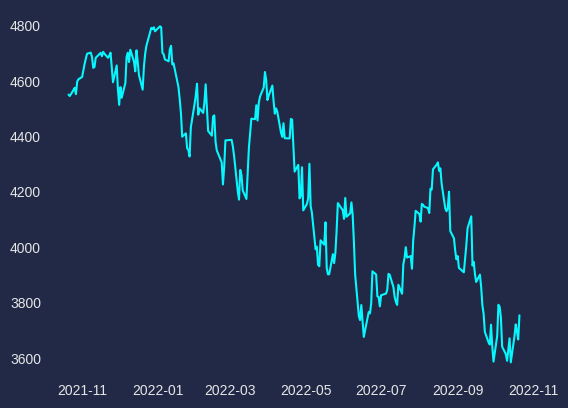

In [5]:
# # Volatilidade S&P500
#
fig, ax = plt.subplots()
plt.style.use("cyberpunk")
ax.plot(dados_fechamento.index, dados_fechamento['S&P500'])
ax.grid(False)
plt.savefig('sp.png', dpi = 300)

In [6]:
selic = sgs.get({'selic':432}, start= '2010-01-01')
display(selic)

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2022-10-17,13.75
2022-10-18,13.75
2022-10-19,13.75


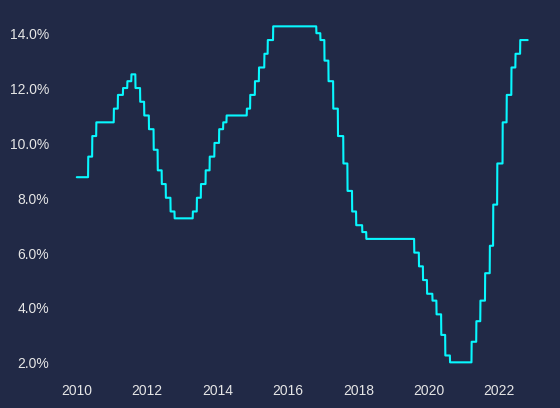

In [7]:
fig, ax = plt.subplots()
plt.style.use('cyberpunk')

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi=300)

plt.show()

In [8]:
# Série do IPCA e IGP-M

inflacao = sgs.get({'ipca': 433, 'igp-m': 189}, start=um_ano_atras + timedelta(180)) # 6 meses de dados
display(inflacao)

,ipca,igp-m
Date,,
2022-04-01,1.06,1.41
2022-05-01,0.47,0.52
2022-06-01,0.67,0.59
2022-07-01,-0.68,0.21
2022-08-01,-0.36,-0.70
2022-09-01,-0.29,-0.95


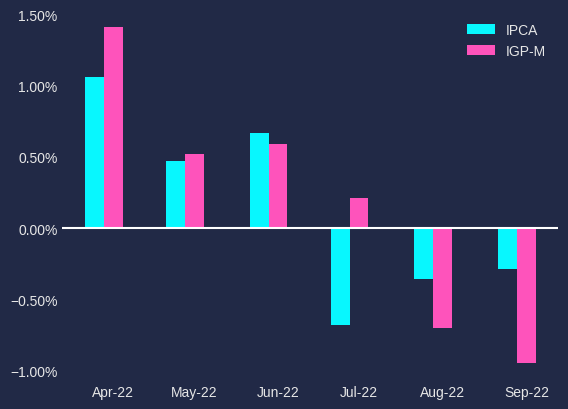

In [14]:
datas_numericas = date2num(inflacao.index)

fig, ax = plt.subplots()

ax.bar(datas_numericas-7, inflacao['ipca'], label="IPCA", width=7)
ax.bar(datas_numericas, inflacao['igp-m'], label="IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.xaxis_date()

formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)

ax.grid(False)
plt.axhline(y=0, color='w')
plt.legend()

plt.savefig('inflacao.png', dpi=300)

plt.show()